<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP5_Crimen_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP5_Crimen_USA
## Violent Crime Rates by US State
This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. The goal of this project is to identify hierarchies of clusters of US states according to violent crime rates data [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). Feel free to augment this data set with other sources. 

In [ ]:
import pandas as pd
import io 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime = crime.rename(columns={'Unnamed: 0':'Estados'})
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Estados   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
ncrime = crime.drop(columns='Estados')
ncrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [ ]:
# Revisar categorias agrupadas por Estados

print (crime.groupby(by=['UrbanPop', 'Estados']).sum().groupby(level=[0]).cumsum())


                         Murder  Assault   Rape
UrbanPop Estados                               
32       Vermont            2.2       48   11.2
39       West Virginia      5.7       81    9.3
44       Mississippi       16.1      259   17.1
         North Dakota      16.9      304   24.4
45       North Carolina    13.0      337   16.1
         South Dakota      16.8      423   28.9
48       Alaska            10.0      263   44.5
         South Carolina    24.4      542   67.0
50       Arkansas           8.8      190   19.5
51       Maine              2.1       83    7.8
52       Kentucky           9.7      109   16.3
53       Montana            6.0      109   16.4
54       Idaho              2.6      120   14.2
56       New Hampshire      2.1       57    9.5
57       Iowa               2.2       56   11.3
58       Alabama           13.2      236   21.2
59       Tennessee         13.2      188   26.9
60       Georgia           17.4      211   25.8
         Wyoming           24.2      372

<ipython-input-7-be28acb53df9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  crime.drop(['UrbanPop'],1).hist()


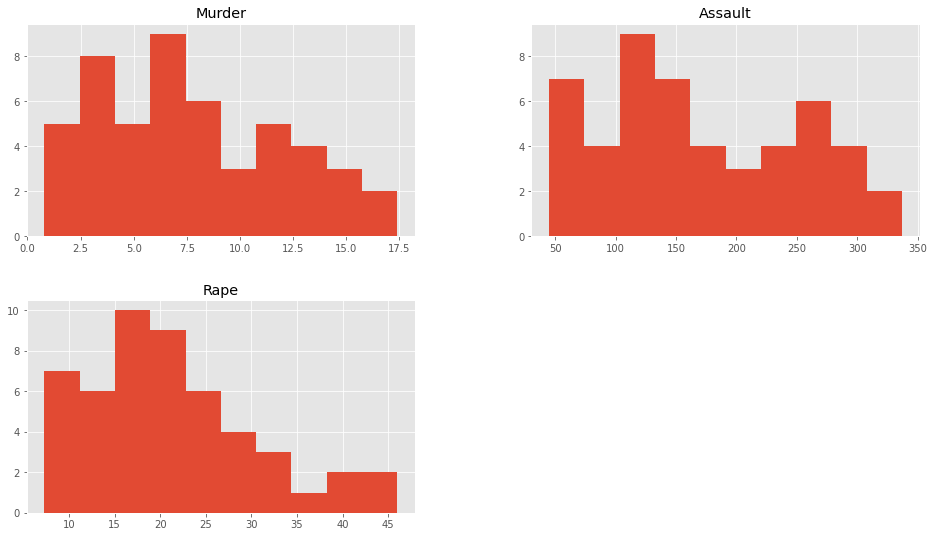

In [ ]:
crime.drop(['UrbanPop'],1).hist()
plt.show()

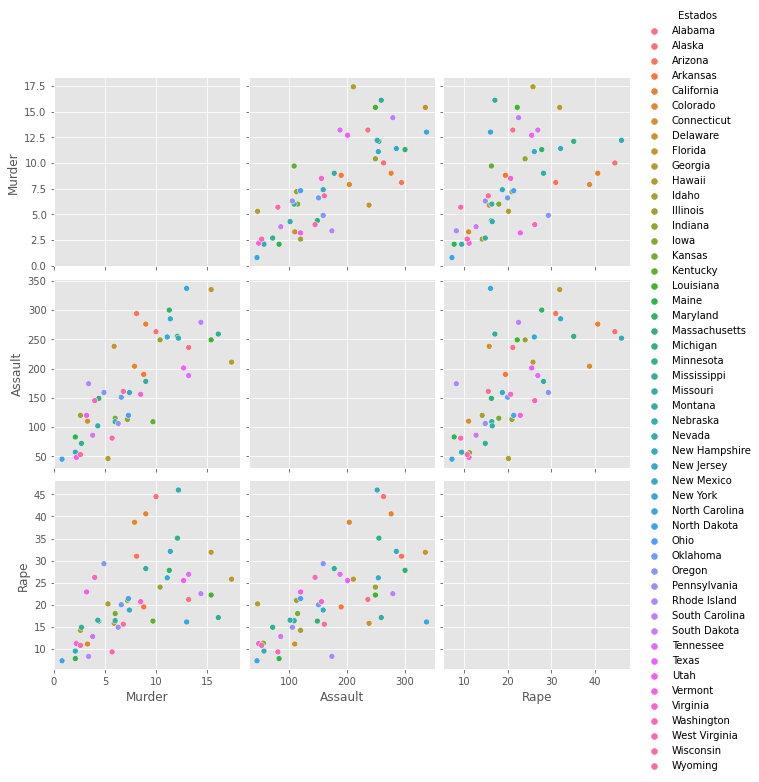

In [ ]:
sb.pairplot(crime.dropna(), hue='Estados',height=3,vars=["Murder","Assault","Rape"],kind='scatter')

In [ ]:
X = np.array(crime[["Murder","Assault","Rape"]])

y = np.array(crime['Estados'])
X.shape

(50, 3)

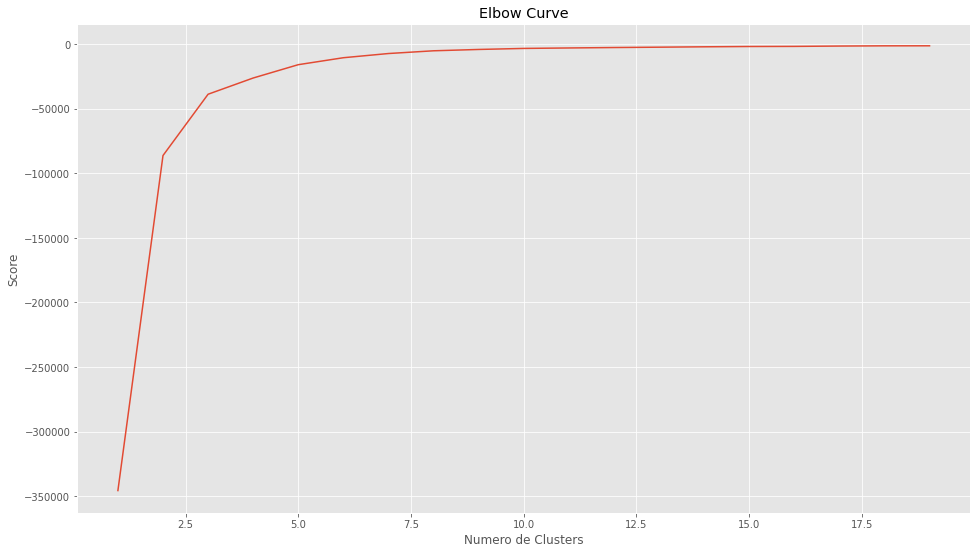

In [ ]:
#Obtener el valor K

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#Entrena con K optimo
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 11.8        255.45454545  28.64545455]
 [  2.95        62.7         11.51      ]
 [  8.21428571 173.28571429  22.84285714]
 [ 11.84       310.2         27.78      ]
 [  5.59       112.4         17.27      ]]


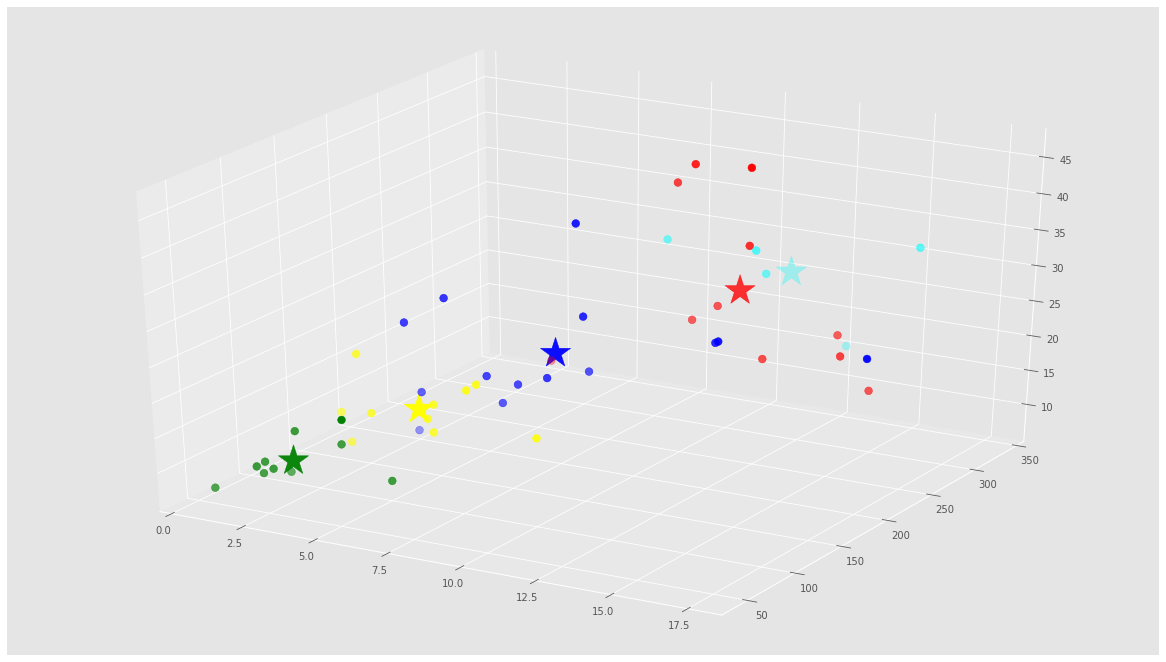

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

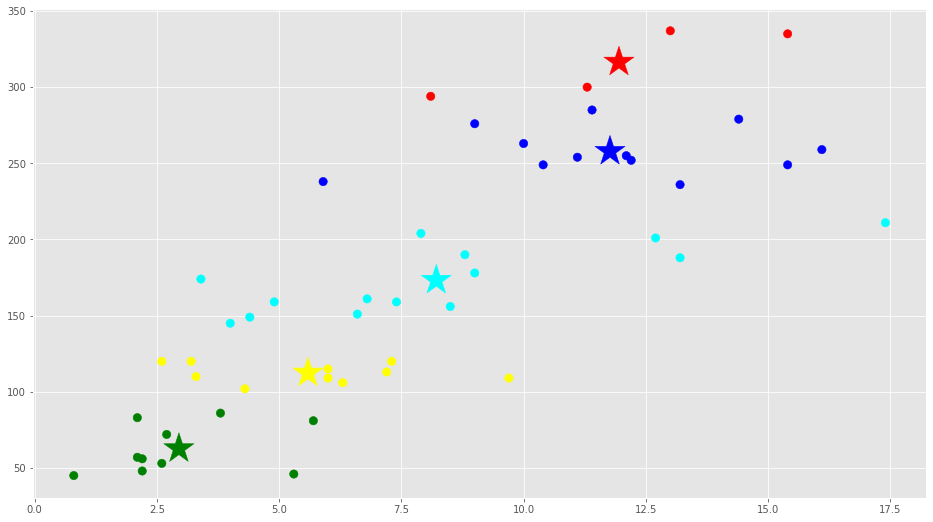

In [ ]:
# Getting the values and plotting it
f1 = crime['Murder'].values
f2 = crime['Assault'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Cantidad por cluster
copy =pd.DataFrame()
copy['Estados']=crime['Estados'].values
copy['UrbanPop']=crime['UrbanPop'].values
copy['label'] = labels;
cantidadGrupo =pd.DataFrame()
cantidadGrupo['Color']=colores
cantidadGrupo['Cantidad']=copy.groupby('label').size()
cantidadGrupo

,Color,Cantidad
0,red,4
1,green,10
2,blue,12
3,cyan,14
4,yellow,10


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([19, 28, 31, 24, 15])

In [ ]:
Estados=crime['UrbanPop'].values
for row in closest:
  print(Estados[row])

67
56
86
70
66
